<a href="https://colab.research.google.com/github/09gauravbisht/PlayStore-app-review-analysis-/blob/main/INDIVIDUAL_NOTEBOOK_Capstone_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# **PROJECT DESCRIPTION**

*Mobile apps are everywhere. According to state counter global stats over 71.86% of mobile operating system market is shared by android worldwide - 'july 2022', so clearly andriod dominates in global market share.They are trouble free to create, profitable or booming & are very useful and because of all these factors, apps are being developed progressively. In this project, We will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Playstore all across different categories. We'll look for different insights in the data to conceive strategies to operate and grasp info. The data for this project was taken from the Google Play Store website.The given data files are as follows:*


# Here we have 2 csv files in the current version of the dataset:



**1. googleplaystore.csv** :

* Above file holds all the details of the apps on Google Play.*

Here i have taken 9 important features out of 13 that describe a given app.

**App**: Name of the app

**Rating** : Gives current average rating (out of 5) of the app on Google Play

**Reviews** : Number of user reviews given on the app

**Category** : Category of the app. for examples are: FAMILY, SOCIAL, TOOLS, COMMUNICATION etc.

**Size** : Size of the app in MB (megabytes), KB (kilobytes), GB (gigabytes)

**Type** : paid or free

**Price** : Price of the app in US$ on Google Play Store

**Last Updated** : Date on which the app was last updated on Google Play

**Installs** : NO. of times any given app is or was downloaded/installed from Google Play




**2. googleplaystore_user_reviews.csv :**

* Above file holds 100 reviews for each app, passed and accepted via sentiment investigator engine & it's sentiment score.*

**Review** : Preliminary processed user review text

**App** : Name of the app on which the user review was provided. Matches the `App` column of the `apps.csv` file

**Sentiment Category** : User review - Positive, Negative or Neutral

**Sentiment Score** : Sentiment score of the user review.

## **Importing Libraries**

*To start this exploratory analysis, firstly we will use numpy, pandas,matplotlib & seaborn to import libraries and define functions for plotting the data.*

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import plotly.express as px
%matplotlib inline
import warnings



## **Importing Dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
working_path = '/content/drive/MyDrive/ALMABETTER/CAPSTONE PROJECT/Project 1 - play store app review & analysis/Data. Csv files/ Play Store Data.csv'
data_df = pd.read_csv(working_path)

In [5]:
data_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
data_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [7]:
data_df.sample(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9273,EF Classroom,FAMILY,3.2,190,23M,"50,000+",Free,0,Everyone,Education,"July 23, 2018",3.0.0.2927,5.0 and up
1516,Best New Ringtones 2018 Free 🔥 For Android™,LIBRARIES_AND_DEMO,4.6,3014,21M,"100,000+",Free,0,Everyone,Libraries & Demo,"June 27, 2018",1.1,5.0 and up


In [8]:
# Categories present in data
data_df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [9]:
# Checking all the column names
data_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [10]:
# Checking NO. of rows and columns
data_df.shape

(10841, 13)

In [11]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [12]:
data_df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# *Cleaning Data*

In [13]:
data_df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [14]:
data_df['Reviews'] = pd.to_numeric(data_df['Reviews'],errors = 'coerce')
data_df['Reviews'].isnull().sum()

1

In [15]:
# Null Count in Each Column

for i in data_df.columns:
    print(i,"=",data_df[i].isna().sum(),'\n')

App = 0 

Category = 0 

Rating = 1474 

Reviews = 1 

Size = 0 

Installs = 0 

Type = 1 

Price = 0 

Content Rating = 1 

Genres = 0 

Last Updated = 0 

Current Ver = 8 

Android Ver = 3 



In [16]:
# Checking Duplicate Rows

data_df.duplicated().value_counts()

False    10358
True       483
dtype: int64

In [17]:
# Dropping Duplicate Rows

data_df.drop_duplicates(inplace=True)

In [18]:
# Duplicate Apps
data_df.duplicated(['App']).value_counts()

False    9660
True      698
dtype: int64

In [19]:
# Dropping duplicate Apps
data_df.drop_duplicates(['App'],inplace=True)

In [20]:
data_df.shape

(9660, 13)

In [21]:
# Dropping duplicate category, reviews, size & installs
data_df.drop_duplicates(['Category', 'Reviews', 'Size', 'Installs'], inplace = True)

In [22]:
# Check For The Outliers

# Importing plotly.express library as px 
import plotly.express as px
# Using scatter plot
px.scatter(data_df, x = data_df.Rating)


In [23]:
# NaN Values in Rating Columns With Median 
data_df.Rating.fillna(data_df.Rating.median(),inplace=True)

In [24]:
# Convert Reviews To int 
data_df['Reviews']=pd.to_numeric(data_df['Reviews'])

In [25]:
# Dropping Current version, last updated & android version 
data_df = data_df.drop(['Last Updated','Current Ver'],axis=1)
data_df


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,4.3,0.0,9.6M,10+,Free,0,Everyone,Business,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53M,"5,000+",Free,0,Everyone,Education,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3.0,9.5M,"1,000+",Free,0,Everyone,Medical,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,Varies with device


In [26]:
I=[i for i in data_df['Category']]

def category_cleaning(category):
  Cleaned_data=[]
  for x in category:
    if '1.9' in category:
      x=x.replace('1.9', '')

    Cleaned_data.append(x)

  return Cleaned_data


In [27]:
NAN_value=data_df.dropna(subset=['Rating','Type','Content Rating', 'Category'])
NAN_value

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,4.3,0.0,9.6M,10+,Free,0,Everyone,Business,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53M,"5,000+",Free,0,Everyone,Education,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3.0,9.5M,"1,000+",Free,0,Everyone,Medical,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,Varies with device


## FIX PRICE

In [28]:
for a in data_df['Price'].unique() :
    print(a)

0
$4.99
$3.99
$6.99
$1.49
$2.99
$7.99
$5.99
$3.49
$1.99
$9.99
$7.49
$0.99
$9.00
$5.49
$10.00
$24.99
$11.99
$79.99
$16.99
$14.99
$1.00
$29.99
$12.99
$2.49
$10.99
$1.50
$19.99
$15.99
$33.99
$74.99
$39.99
$3.95
$4.49
$1.70
$8.99
$2.00
$3.88
$25.99
$399.99
$17.99
$400.00
$3.02
$1.76
$4.84
$4.77
$1.61
$2.50
$1.59
$6.49
$1.29
$5.00
$13.99
$299.99
$379.99
$37.99
$18.99
$389.99
$19.90
$8.49
$1.75
$14.00
$4.85
$46.99
$109.99
$154.99
$3.08
$2.59
$4.80
$1.96
$19.40
$3.90
$4.59
$15.46
$3.04
$4.29
$2.60
$3.28
$4.60
$2.95
$2.90
$1.97
$200.00
$89.99
$2.56
$30.99
$3.61
$394.99
$1.26
Everyone
$1.20
$1.04


In [29]:
def fix_price(a) :
    try :
        if a.startswith('$') :
            return float(a[1:])
        elif a.startswith('Everyone') :
            return float(0)
        else :
            return float(a)
    except :
        return float(0)

In [30]:
data_df['Price'] = data_df['Price'].apply(fix_price)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9569 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9569 non-null   object 
 1   Category        9569 non-null   object 
 2   Rating          9569 non-null   float64
 3   Reviews         9568 non-null   float64
 4   Size            9569 non-null   object 
 5   Installs        9569 non-null   object 
 6   Type            9568 non-null   object 
 7   Price           9569 non-null   float64
 8   Content Rating  9568 non-null   object 
 9   Genres          9569 non-null   object 
 10  Android Ver     9566 non-null   object 
dtypes: float64(3), object(8)
memory usage: 897.1+ KB


## FIXING SIZE

In [31]:
# Clean the 'Size' convert 'Size' object into Float
# While analyzing the data in pivot table found a value with 1000+

index = data_df[data_df['Size']== '1,000+'].index
data_df.drop(axis=0,inplace=True, index=index)

S = [i for i in data_df['Size']]

def clean_sizes (sizes):

  Cleaned_data=[]

  for s in sizes:
    s = str(s)
    if 'M' in s:
      s = s.replace('M' , '')
      s=float(s)
      
      


    elif 'k' in s:
      s= s.replace('k', '')
      s=float(s)
      s= s/1024                   

    elif 'Varies with device' in s:
      s=float(0)
      

    Cleaned_data.append(s)

  return Cleaned_data
data_df['Size'] = clean_sizes(S)
data_df['Size']= data_df['Size'].astype(float)


In [32]:
data_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,Art & Design,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,4.4 and up


In [33]:
data_df.describe()

,Rating,Reviews,Size,Price
count,9568.000000,9.568000e+03,9568.000000,9568.000000
mean,4.191733,2.186487e+05,17.812988,1.106414
std,0.497402,1.839887e+06,21.570160,16.929383
min,1.000000,0.000000e+00,0.000000,0.000000
25%,4.000000,2.800000e+01,2.900000,0.000000
50%,4.300000,1.028500e+03,9.100000,0.000000
75%,4.500000,2.985725e+04,25.000000,0.000000
max,5.000000,7.815831e+07,100.000000,400.000000


## **Final Dataset Look**

In [34]:
data_df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,Art & Design,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5.6,"50,000+",Free,0.0,Everyone,Art & Design,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178.0,19.0,"50,000+",Free,0.0,Everyone,Art & Design,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815.0,29.0,"1,000,000+",Free,0.0,Everyone,Art & Design,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791.0,33.0,"1,000,000+",Free,0.0,Everyone,Art & Design,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121.0,3.1,"10,000+",Free,0.0,Everyone,Art & Design;Creativity,4.0.3 and up


## **Different columns distribution graphs (histogram & bar graph)**

In [35]:
def column_distribution(data_df, nGraphShown, nGraphPerRow):
    HC = data_df.nunique()
    data_df = data_df[[col for col in data_df if HC[col] > 1 and HC[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = data_df.shape
    columnNames = list(data_df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = data_df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()

            plt.style.use('classic')
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [36]:
nRowsRead = 1000 
# googleplaystore.csv has 10841 rows in reality, but we are only loading/previewing the first 1000 rows
df_1 = pd.read_csv('/content/drive/MyDrive/ALMABETTER/CAPSTONE PROJECT/Project 1 - play store app review & analysis/Data. Csv files/ Play Store Data.csv', delimiter=',', nrows = nRowsRead)
df_1.dataframeName = 'googleplaystore.csv'
nRow, nCol = df_1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 13 columns


In [37]:
df_1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


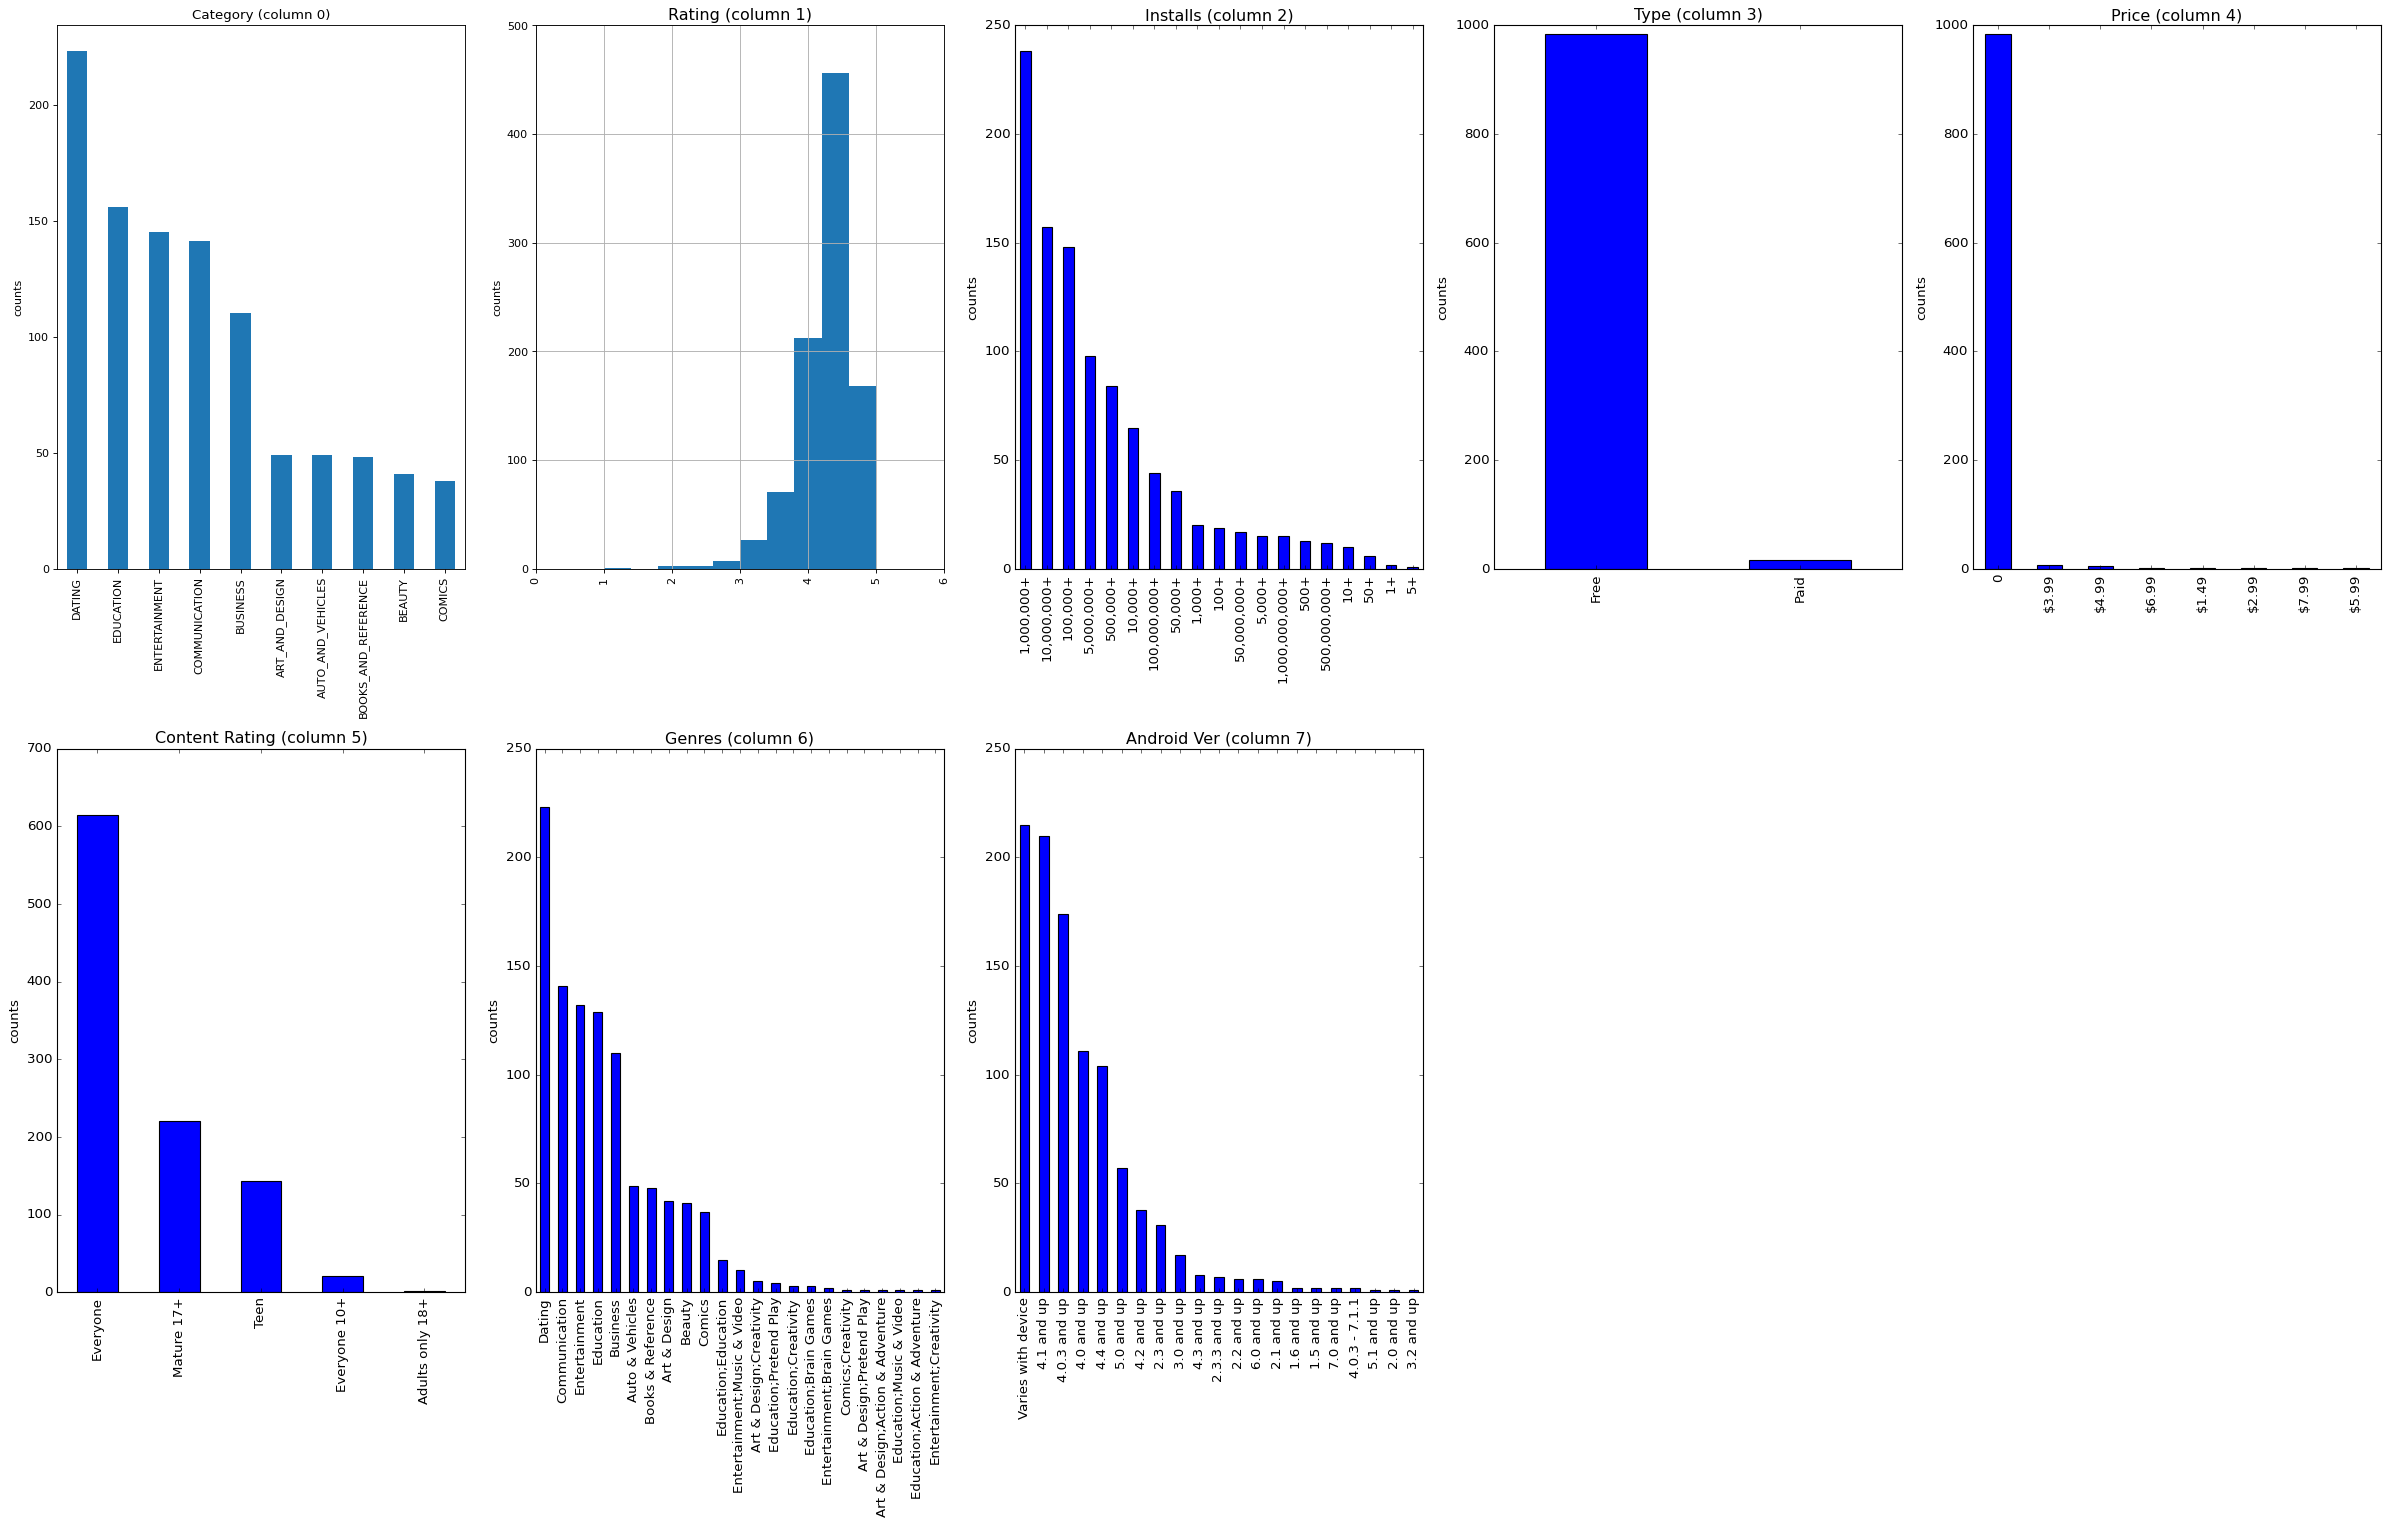

In [38]:
# Here we can see the sampled columns and there distribution plots
column_distribution(df_1, 10, 5) 

In [39]:
data_df.describe()

,Rating,Reviews,Size,Price
count,9568.000000,9.568000e+03,9568.000000,9568.000000
mean,4.191733,2.186487e+05,17.812988,1.106414
std,0.497402,1.839887e+06,21.570160,16.929383
min,1.000000,0.000000e+00,0.000000,0.000000
25%,4.000000,2.800000e+01,2.900000,0.000000
50%,4.300000,1.028500e+03,9.100000,0.000000
75%,4.500000,2.985725e+04,25.000000,0.000000
max,5.000000,7.815831e+07,100.000000,400.000000


In [40]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9568 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9568 non-null   object 
 1   Category        9568 non-null   object 
 2   Rating          9568 non-null   float64
 3   Reviews         9568 non-null   float64
 4   Size            9568 non-null   float64
 5   Installs        9568 non-null   object 
 6   Type            9567 non-null   object 
 7   Price           9568 non-null   float64
 8   Content Rating  9568 non-null   object 
 9   Genres          9568 non-null   object 
 10  Android Ver     9566 non-null   object 
dtypes: float64(4), object(7)
memory usage: 897.0+ KB


In [41]:
data_df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
9014,DW Uninstall Applications,TOOLS,4.3,0.0,2.5,10+,Free,0.00,Everyone,Tools,2.3 and up
10255,Fulham FC,SPORTS,4.3,401.0,2.8,"10,000+",Free,0.00,Everyone,Sports,2.3 and up
2282,Breathing Zone,MEDICAL,4.6,319.0,0.0,"5,000+",Paid,3.99,Everyone,Medical,Varies with device
3664,ForecaWeather,WEATHER,4.2,18425.0,5.3,"1,000,000+",Free,0.00,Everyone,Weather,4.1 and up
4091,theScore esports,SPORTS,4.5,16257.0,14.0,"500,000+",Free,0.00,Everyone 10+,Sports,4.1 and up


## Detect Outliers

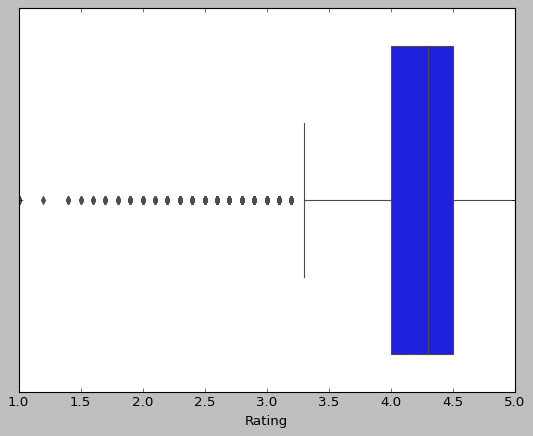

In [42]:
sns.boxplot(x='Rating',data = data_df)

# **EDA { DATA EXPLORATION }**













##**Ques. 1** - What is the Percentage of each application type in google play store ?

In [43]:
x = data_df.groupby(['Category'],as_index=False)['App'].count()
px.pie(x,values='App',names='Category',title='Percentage Of Each Apps Type').show()

print('Top 10 Comman Apps Category in Google Play Store','\n'
      ,x.sort_values(by ='App',ascending =False))
x.head()

Top 10 Comman Apps Category in Google Play Store 
                Category   App
11               FAMILY  1811
14                 GAME   958
29                TOOLS   823
4              BUSINESS   413
20              MEDICAL   374
25         PRODUCTIVITY   372
23      PERSONALIZATION   371
18            LIFESTYLE   367
12              FINANCE   343
6         COMMUNICATION   309
28               SPORTS   309
15   HEALTH_AND_FITNESS   286
24          PHOTOGRAPHY   281
21   NEWS_AND_MAGAZINES   254
27               SOCIAL   239
3   BOOKS_AND_REFERENCE   222
30     TRAVEL_AND_LOCAL   219
26             SHOPPING   202
7                DATING   171
31        VIDEO_PLAYERS   163
19  MAPS_AND_NAVIGATION   131
8             EDUCATION   119
13       FOOD_AND_DRINK   111
9         ENTERTAINMENT   102
1     AUTO_AND_VEHICLES    85
17   LIBRARIES_AND_DEMO    84
32              WEATHER    78
16       HOUSE_AND_HOME    74
10               EVENTS    64
0        ART_AND_DESIGN    64
22            PAREN

,Category,App
0,ART_AND_DESIGN,64
1,AUTO_AND_VEHICLES,85
2,BEAUTY,53
3,BOOKS_AND_REFERENCE,222
4,BUSINESS,413


## **Ques. 2** - Which Genre / Category has the highest & which has the lowest number of apps ?

In [44]:
data_df['Category'].value_counts()

FAMILY                 1811
GAME                    958
TOOLS                   823
BUSINESS                413
MEDICAL                 374
PRODUCTIVITY            372
PERSONALIZATION         371
LIFESTYLE               367
FINANCE                 343
COMMUNICATION           309
SPORTS                  309
HEALTH_AND_FITNESS      286
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          111
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  78
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



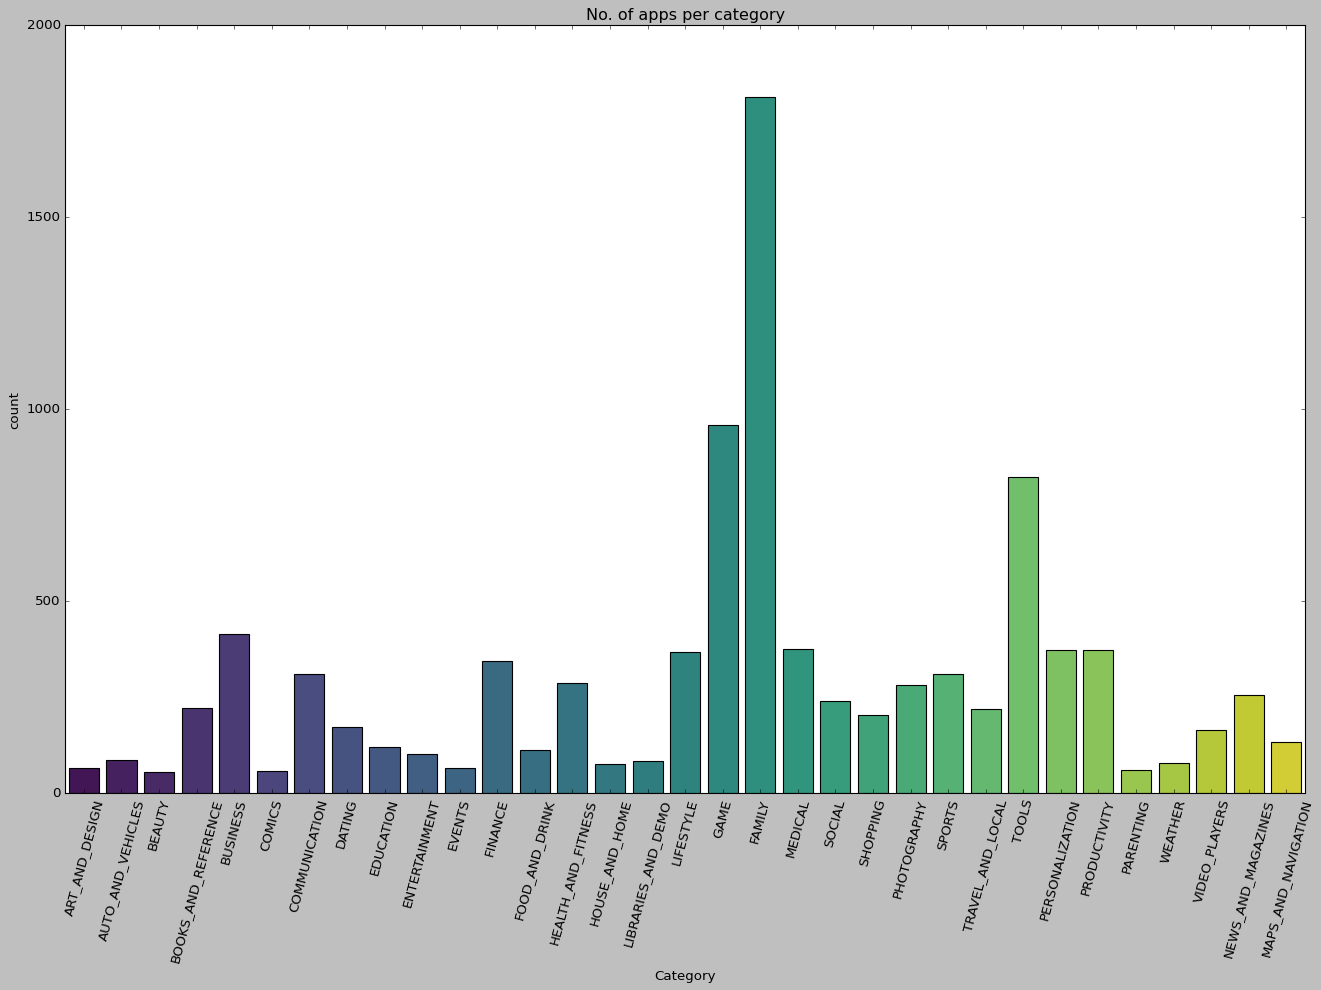

In [45]:
# Plotting a graph on the above result

plt.figure(figsize=(20,12))
z = sns.countplot(data_df['Category'], palette= "viridis" )
z.set_xticklabels(z.get_xticklabels(), rotation = 75)
plt.title('No. of apps per category')
plt.style.use('dark_background')
plt.show()

**Here we can see that "Genre - Family" has the highest no. of applications hold & 'Beauty" has the lowest.**

 Top 3 categories holding max no. of applications are - 
 
1. Family

2. Games

3. Tools

Top 3 Categories having least no. of apps - 

1. Parenting

2. Beauty

3. Comics

## Reviewing top 5 categories

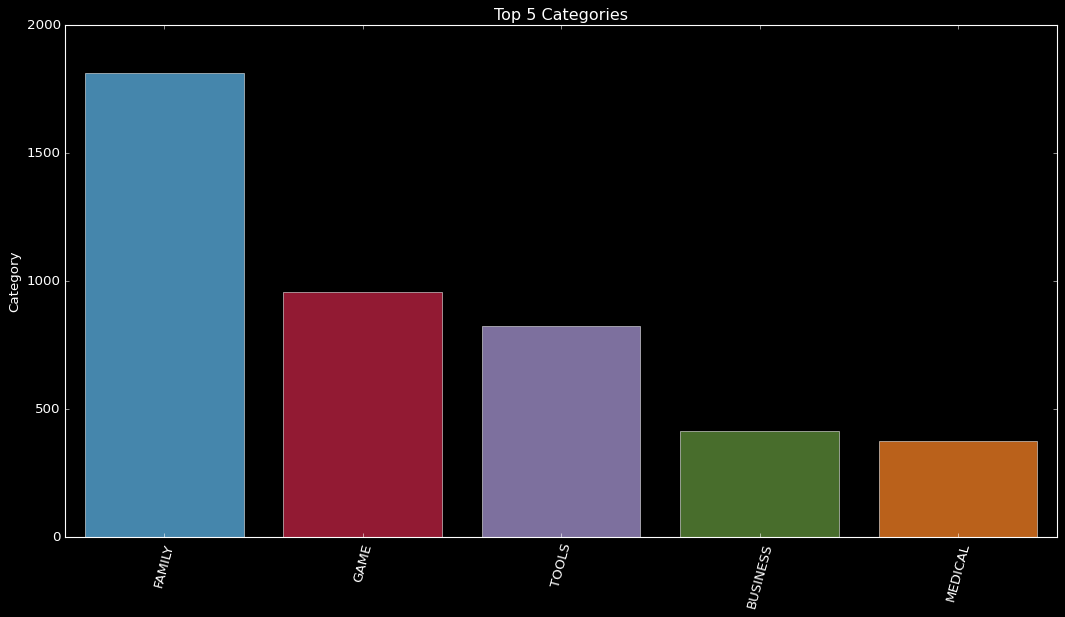

In [46]:
top = data_df.Category.value_counts().sort_values(ascending=False).head(5)
plt.figure(figsize=(16,8))
plt.xticks(rotation=75)
plt.title('Top 5 Categories')
ylable = ('Number of Apps')
plt.style.use('bmh')
sns.barplot(x= top.index, y=top)

## **Ques. 3** - What percentage of apps are paid & free in google play store, also the amount of paid & free apps in diff. categories in play store ?

In [47]:
x = data_df.groupby('Type',as_index=False)['App'].count()
print('\n'*2+'Most Of Apps In Google Play are Free'+'\n'*2)
px.pie(x,values='App',names='Type',color='Type',
       color_discrete_map={'Free':'purple','Paid':'yellow'}).show()



Most Of Apps In Google Play are Free




## Amount of Apps in paid & free apps in diff. categories in google play store.

In [73]:
amount = data_df.groupby(['Type','Category'],as_index=False)['App'].count()
px.sunburst(amount, values='App', path=['Type','Category'], title='Amount Of Apps in Paid and Free Category', color='Category')

# Here we have used plotly sunburst plots to visualize hierarchical data spanning outwards radically from the roots to leaves (just like a doughnut).
# Here the sectors are determined by the categories and the inner ring tells about the % of free & paid apps.

## **Ques. 4** - Finding the reviews on the basis of category wise dataset ?

In [49]:
data_df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
4348,Mobizen Screen Recorder for SAMSUNG,VIDEO_PLAYERS,4.4,953894.0,37.000000,"10,000,000+",Free,0.0,Everyone,Video Players & Editors,Varies with device
3190,KLM - Royal Dutch Airlines,TRAVEL_AND_LOCAL,3.7,7705.0,40.000000,"1,000,000+",Free,0.0,Everyone,Travel & Local,4.1 and up
6768,BT One Voice mobile access,COMMUNICATION,4.0,32.0,0.426758,"5,000+",Free,0.0,Everyone,Communication,1.6 and up
6572,Habbo - Virtual World,FAMILY,3.8,159398.0,28.000000,"5,000,000+",Free,0.0,Teen,Role Playing,4.2 and up
2515,AAFP,MEDICAL,3.8,63.0,24.000000,"10,000+",Free,0.0,Everyone,Medical,5.0 and up


<BarContainer object of 9568 artists>

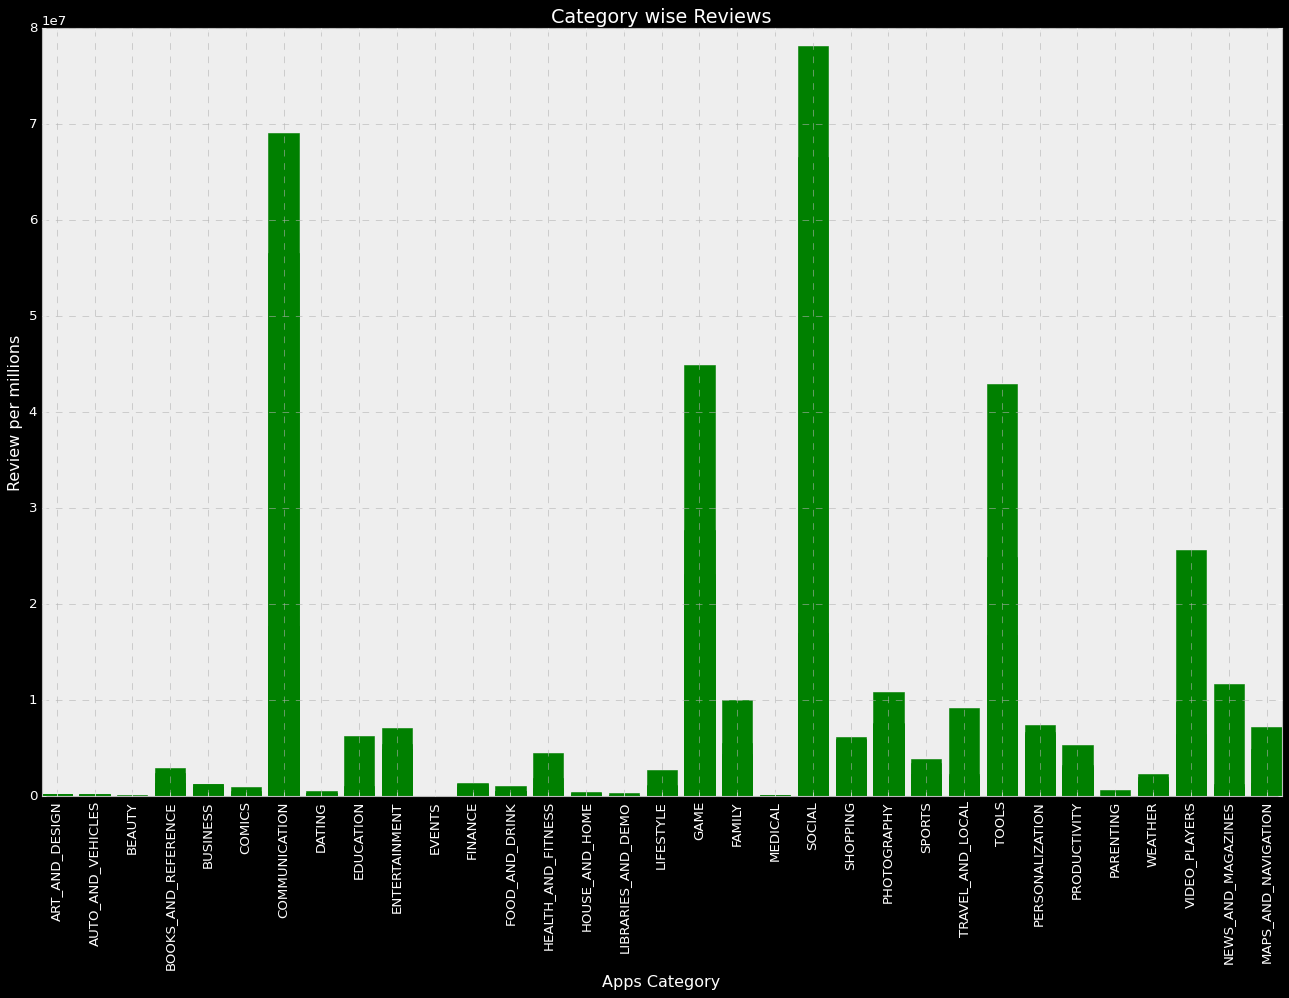

In [50]:
# FINDING REVIEWS CATEGORY WISE

# ploting bar graph

plt.figure(figsize=(20,12))
plt.xticks(rotation=90)

plt.style.use('seaborn-deep')
plt.title('Category wise Reviews')
plt.xlabel('Apps Category')
plt.ylabel('Review per millions')
plt.bar(data_df.Category,data_df.Reviews,Color = 'g')

*Here by looking at this bar graph we conclude that most of apps which are built as social media or communication apps have highest reviews follwed by 'game' & 'family'*

## **Ques. 5** - which are the top 10 social media/communication apps and games ?

### **Top 10 social Apps**

In [51]:
social_df = data_df[data_df.Category!='GAME']
social_df.sort_values(by = ['Installs','Reviews', 'Rating'], ascending = False)[['App','Installs','Reviews', 'Rating', 'Type']].head(10)

,App,Installs,Reviews,Rating,Type
4005,Clean Master- Space Cleaner & Antivirus,"500,000,000+",42916526.0,4.7,Free
7536,"Security Master - Antivirus, VPN, AppLock, Boo...","500,000,000+",24900999.0,4.7,Free
378,UC Browser - Fast Download Private & Secure,"500,000,000+",17712922.0,4.5,Free
2550,Snapchat,"500,000,000+",17014787.0,4.0,Free
3739,Twitter,"500,000,000+",11667403.0,4.3,Free
342,Viber Messenger,"500,000,000+",11334799.0,4.3,Free
403,LINE: Free Calls & Messages,"500,000,000+",10790289.0,4.2,Free
2546,Facebook Lite,"500,000,000+",8606259.0,4.3,Free
3255,SHAREit - Transfer & Share,"500,000,000+",7790693.0,4.6,Free
3703,MX Player,"500,000,000+",6474426.0,4.5,Free


## **Calculating the average rating of social apps**

In [52]:
rating = social_df.Rating.mean()
print('The overall average rating of Apps is {:.2f} '.format(rating))

The overall average rating of Apps is 4.19 


## **Top 10 Games**

In [53]:
game_df =data_df[data_df.Category=='GAME']
game_df.sort_values(by = ['Installs','Reviews', 'Rating'], ascending = False)[['App','Installs','Reviews', 'Rating', 'Type']].head(10)

,App,Installs,Reviews,Rating,Type
1655,Candy Crush Saga,"500,000,000+",22426677.0,4.4,Free
1722,My Talking Tom,"500,000,000+",14891223.0,4.5,Free
1662,Pou,"500,000,000+",10485308.0,4.3,Free
1661,Temple Run 2,"500,000,000+",8118609.0,4.3,Free
4999,AE Bingo: Offline Bingo Games,"500,000+",61746.0,4.4,Free
7152,ARK: Survival Evolved,"500,000+",51523.0,3.8,Free
4901,Assassin's Creed Identity,"500,000+",42529.0,3.7,Paid
4975,Solitaire: Decked Out Ad Free,"500,000+",37302.0,4.9,Free
9595,Fun Texas Hold'em Poker,"500,000+",32831.0,4.5,Free
1858,Might & Magic: Elemental Guardians,"500,000+",32551.0,4.3,Free


## **Calculating the average rating of Games**

In [54]:
rating_2 = game_df.Rating.mean()
print('The overall average rating of Game is {:.2f} '.format(rating_2))

The overall average rating of Game is 4.25 


## **Now detecting the average rating in the play store app & plotting a graph on it.**

In [55]:
overall_rating = data_df.Rating.mean()
print('The average rating in playstore is {:.2f} '.format(rating_2))

The average rating in playstore is 4.25 


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



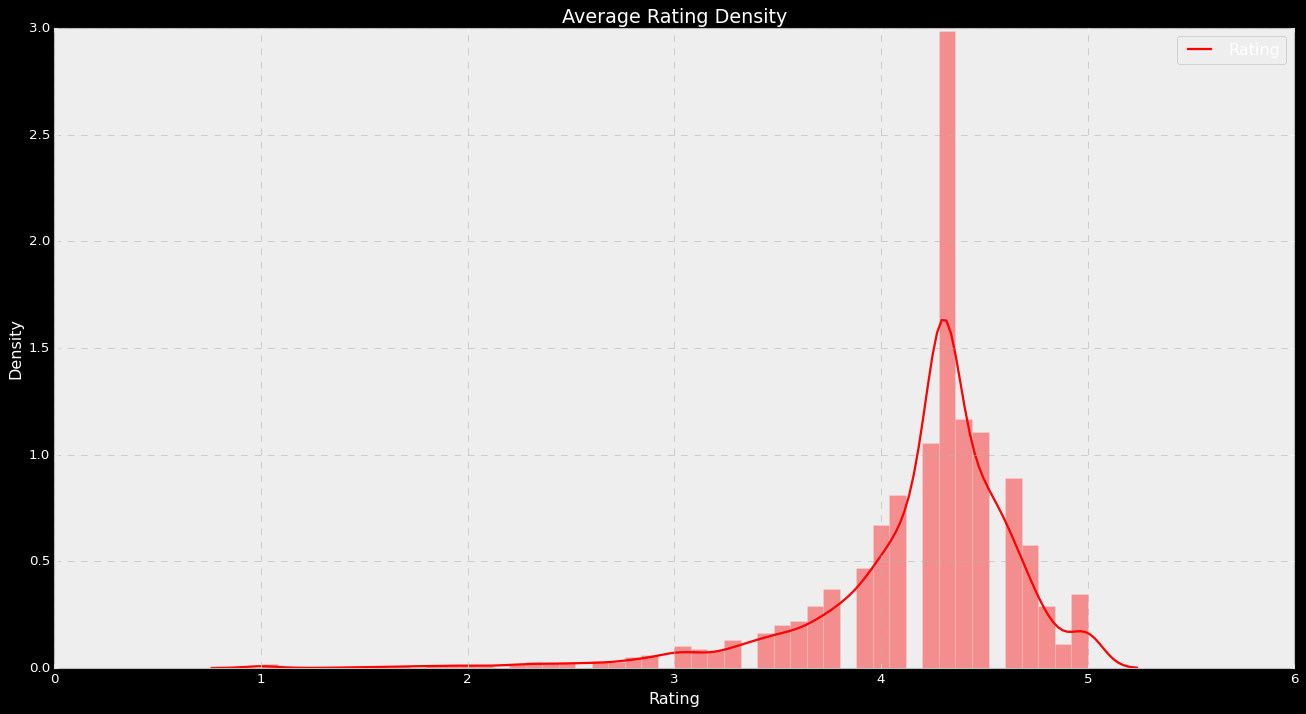

In [56]:
plt.figure(figsize=(20,10))
sns.distplot(data_df['Rating'],color = 'red')

plt.style.use('tableau-colorblind10')
plt.legend(['Rating'])
plt.title('Average Rating Density')
plt.show()

## **Ques. 6** - What are the sizes of the applications present in different categories ?

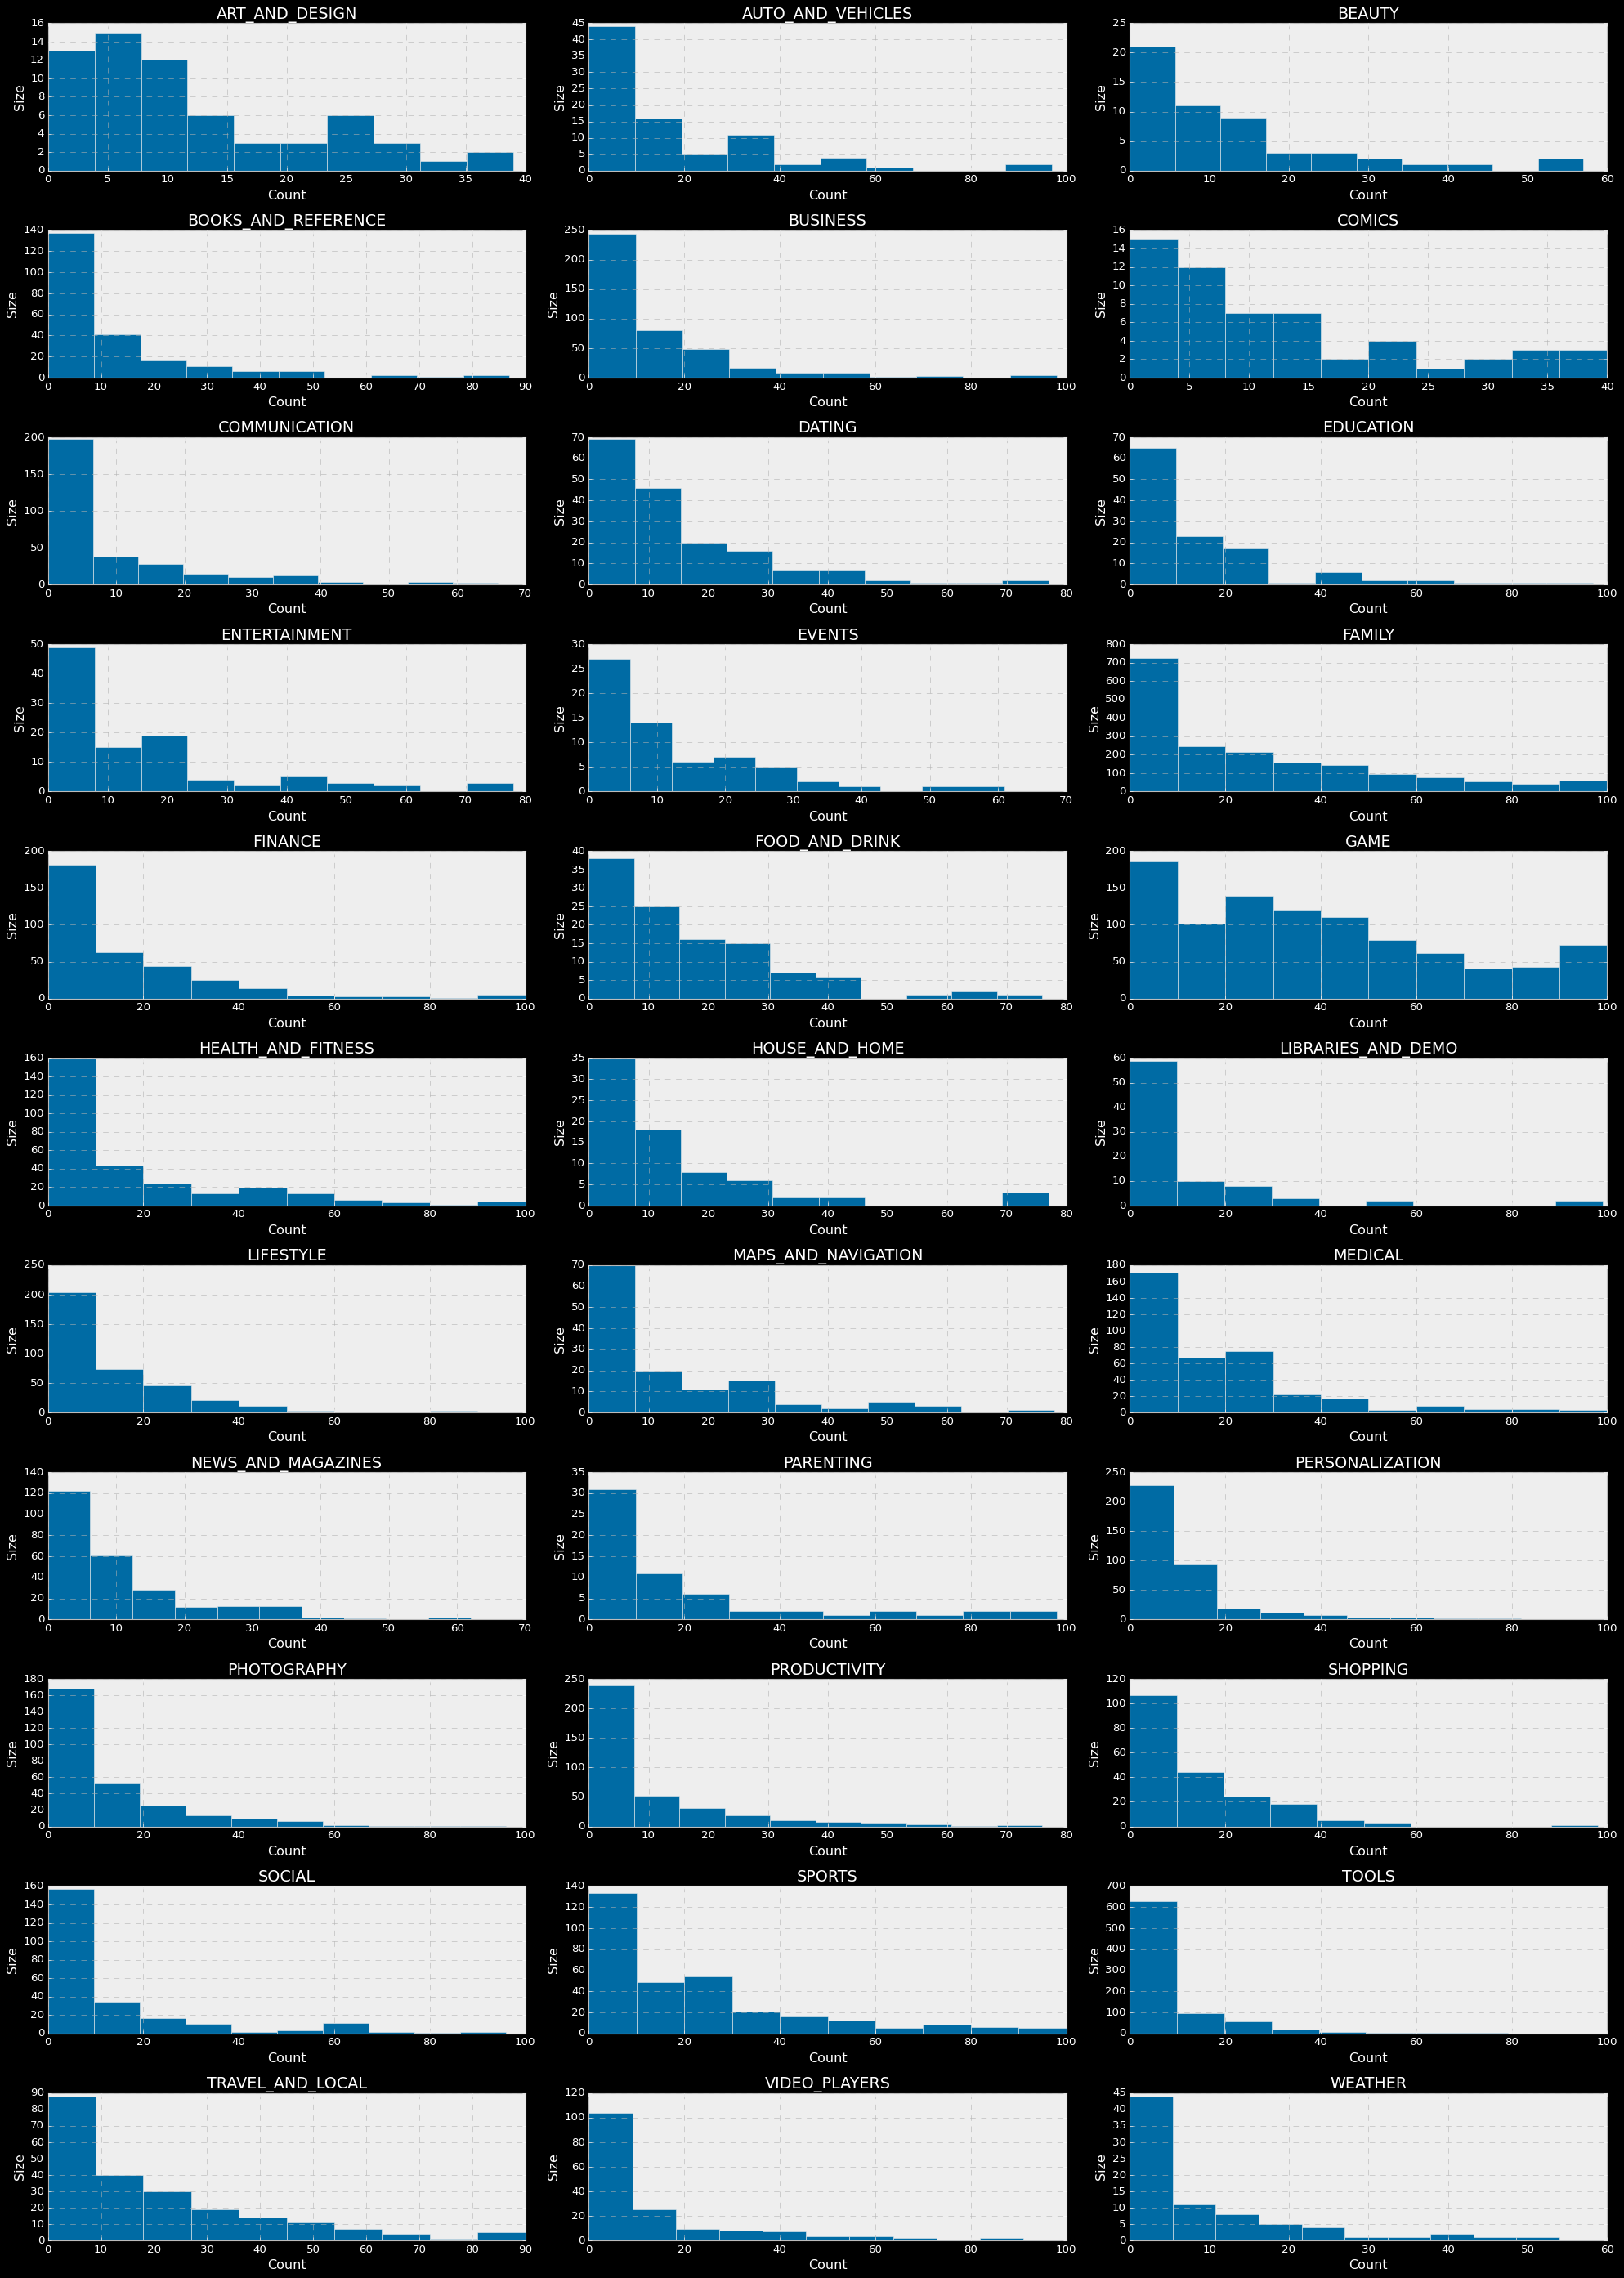

In [57]:
ncount=1
plt.figure(figsize=(25,35))
for x in np.unique(data_df.Category.values):
    plt.subplot(11,3,ncount)
    plt.hist(data_df[data_df.Category == x].Size.values)
    plt.title(x)
    plt.ticklabel_format(useOffset=False, style='sci')
    plt.xlabel("Count")
    plt.ylabel("Size")
    ncount = ncount + 1
plt.tight_layout()


Clearly by the above graphical representation we can see that most of the apps are **low to mid range in size** as compared to **games** where apps are slightly higher in size.

## **Ques. 7** - Which are the top 10 applications having highest no. of installs ?

In [58]:
data_df['Ins'] = data_df['Installs'].str.replace('+','', regex=True)

In [59]:
data_df['Ins'] = data_df['Ins'].str.replace(',','')     # Replacing ','& 'free' ----- '' & '0'

data_df['Ins'] = data_df['Ins'].str.replace('Free','0')

In [60]:
data_df['Ins'] = pd.to_numeric(data_df['Ins'])
data_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver,Ins
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,Art & Design,4.0.3 and up,10000
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,4.0.3 and up,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,4.0.3 and up,5000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,4.2 and up,50000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,4.4 and up,100000
...,...,...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,4.3,0.0,9.6,10+,Free,0.0,Everyone,Business,4.0 and up,10
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53.0,"5,000+",Free,0.0,Everyone,Education,4.1 and up,5000
10838,Parkinson Exercices FR,MEDICAL,4.3,3.0,9.5,"1,000+",Free,0.0,Everyone,Medical,2.2 and up,1000
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,0.0,"1,000+",Free,0.0,Mature 17+,Books & Reference,Varies with device,1000


In [61]:
Ins = data_df.copy()
Ins.sort_values(ascending=False,by=['Installs'],inplace=True)


# Now dropping unwanted columns for the given data

Ins.drop(columns=['Category','Rating','Size','Installs','Type','Price','Content Rating','Reviews','Genres','Android Ver'])

,App,Ins
2546,Facebook Lite,500000000
3235,Google Translate,500000000
3473,Dropbox,500000000
3476,Google Calendar,500000000
3703,MX Player,500000000
...,...,...
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,0
9917,Eu Sou Rico,0
9905,Eu sou Rico,0
5307,Ak Parti Yardım Toplama,0


In [62]:
Ins.drop_duplicates(subset=['App'],keep='first',inplace=True)
Top_10_Installs = Ins.head(10)

In [63]:
figure = px.violin(Top_10_Installs, x='App', y='Installs', points='all', box=True)
figure.show()

## **Ques. 7** - Analyizing the numerical data columns and deriving corelation between them via heatmap ?

In [64]:
data_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver,Ins
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,Art & Design,4.0.3 and up,10000
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,4.0.3 and up,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,4.0.3 and up,5000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,4.2 and up,50000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,4.4 and up,100000


Text(0.5, 1.0, 'Heatmap for numerical columns')

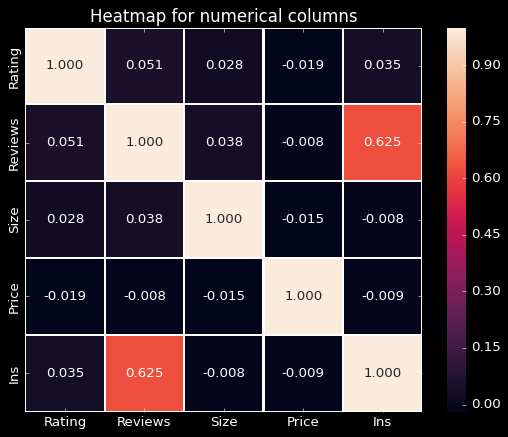

In [65]:
sns.heatmap(data_df.corr(), annot = True, linewidths=1.0, fmt=".3f")
plt.title("Heatmap for numerical columns", size=15)

Above map on inspecting clearly shows the positive corelationship between reviews and install which is 0.625 i.e. as the the number of reviews increases, the number of installations also increase. 

Similarly we can see corelations between other numeric columns too.

## **Ques. 8** - which is the most expensive app in the google play store ? 

In [66]:
data_df[data_df['Price'] == data_df['Price'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver,Ins
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7.3,"10,000+",Paid,400.0,Everyone,Lifestyle,4.1 and up,10000


# **Ques.9** - How many apps are there whose rating is 5 ?

In [67]:
data_df[data_df['Rating'] == 5.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver,Ins
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15.0,37.0,"1,000+",Free,0.00,Everyone,Comics,4.0.3 and up,1000
612,American Girls Mobile Numbers,DATING,5.0,5.0,4.4,"1,000+",Free,0.00,Mature 17+,Dating,4.0.3 and up,1000
615,Awake Dating,DATING,5.0,2.0,70.0,100+,Free,0.00,Mature 17+,Dating,4.4 and up,100
633,Spine- The dating app,DATING,5.0,5.0,9.3,500+,Free,0.00,Teen,Dating,4.0.3 and up,500
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6.0,5.0,100+,Free,0.00,Mature 17+,Dating,4.0.3 and up,100
...,...,...,...,...,...,...,...,...,...,...,...,...
10697,Mu.F.O.,GAME,5.0,2.0,16.0,1+,Paid,0.99,Everyone,Arcade,2.3 and up,1
10721,Mad Dash Fo' Cash,GAME,5.0,14.0,16.0,100+,Free,0.00,Everyone,Arcade,4.1 and up,100
10742,GKPB FP Online Church,LIFESTYLE,5.0,32.0,7.9,"1,000+",Free,0.00,Everyone,Lifestyle,4.4 and up,1000
10776,Monster Ride Pro,GAME,5.0,1.0,24.0,10+,Free,0.00,Everyone,Racing,2.3 and up,10


# **Ques. 10** - which apps are working on which android version ?

In [68]:
data_df['Android Ver'].value_counts()

4.1 and up            2165
4.0.3 and up          1376
4.0 and up            1274
Varies with device     986
4.4 and up             817
2.3 and up             614
5.0 and up             506
4.2 and up             369
2.3.3 and up           271
2.2 and up             237
3.0 and up             231
4.3 and up             218
2.1 and up             133
1.6 and up             116
6.0 and up              53
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              22
1.5 and up              20
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [69]:
a = data_df.pivot_table(columns='Content Rating',values='Rating',aggfunc='count')
a

Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
Rating,3,7823,320,392,1028,2


**Plotting a graph which shows us that which app is running on which version of android**

In [70]:
a = px.violin(data_df, x='Android Ver', y = 'App', points='all')
a.show()

## **Ques. 11** - Relationship between 'Rating' & 'Reviews' ?

Apps having > 1 million reviews


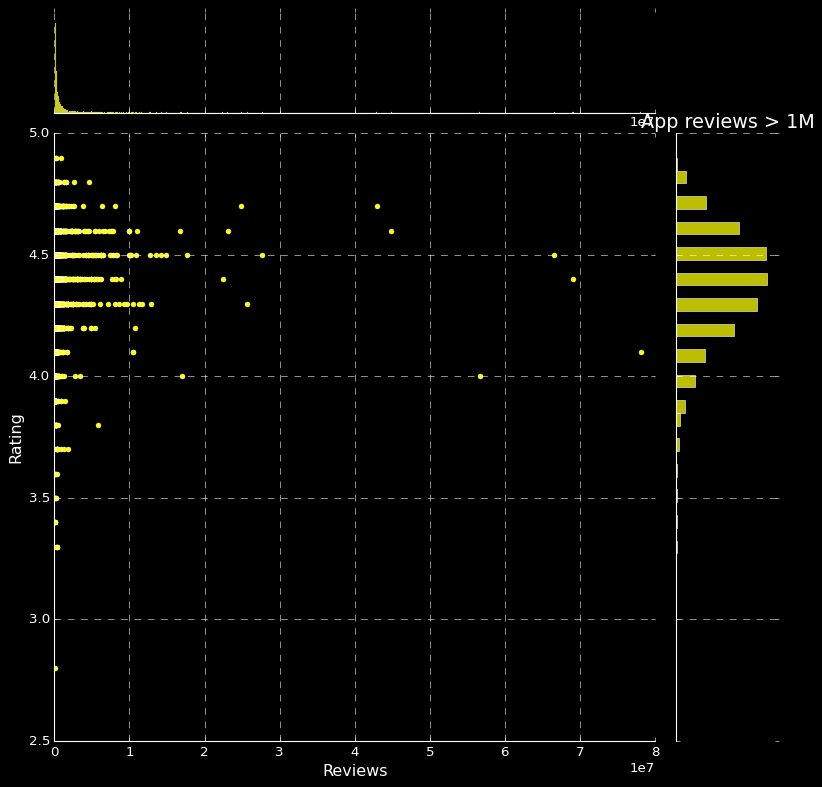

Apps having < 1 million reviews


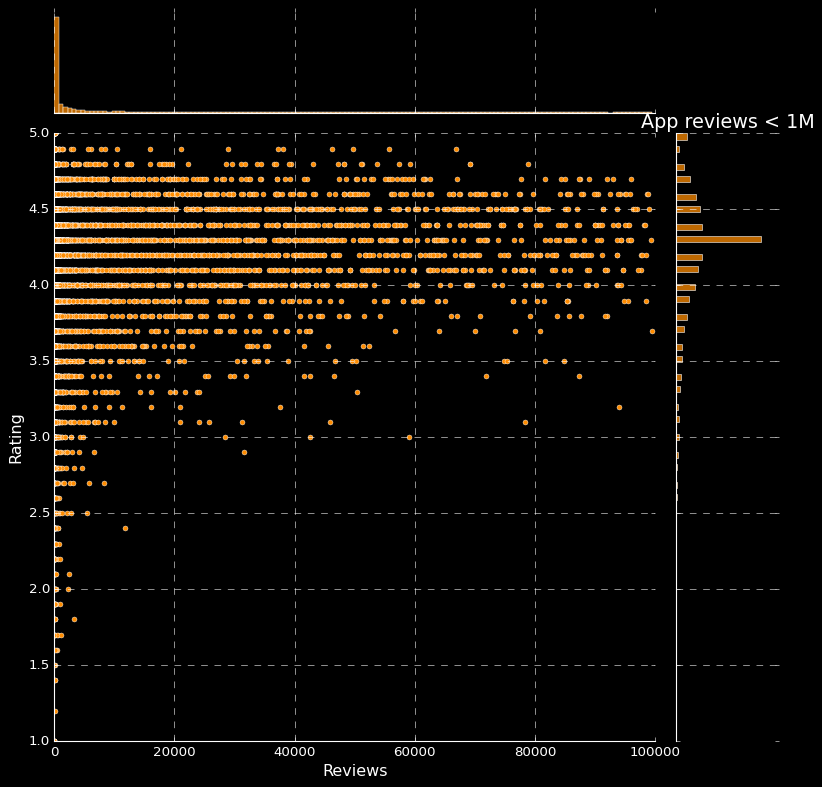

In [72]:
print('Apps having > 1 million reviews')
sns.jointplot(x='Reviews',y='Rating',data =data_df[data_df['Reviews'] > 100000],color='yellow', height=10)

plt.title('App reviews > 1M')
plt.style.use('dark_background')
plt.show()

print('Apps having < 1 million reviews')
sns.jointplot(x='Reviews',y='Rating',data =data_df[data_df['Reviews']<100000],color ='darkorange', height=10)

plt.title('App reviews < 1M')
plt.style.use('dark_background')
plt.show()

## The above observation shows that the the most reviewed apps are likely to have better rating

Hence the conclusion by the above graph is that the apps which are having higher rating also have the highest no. of reviews and vice versa.

# ***INFERENCES & CONCLUSION***

## After analyzing and exploring the data we got to know that this dataset gives us so many intresting insights and useful info about the play store app & thus it will deliver useful info to the customers as well as will direct the developers to get new apps in market and to popularize the product.

## Also while using the visualization libraries i got to know about them alot as each library has it's own strength & weaknesses which are as follows.  - 


*   **MATPLOTLIB** - It's great for distribution analysis but low - level interface.

*   **SEABORN** - It has simple & short code but it dosen't have wide varities as matplotlib.

*   **PLOTLY** - It's very interactive, has versatile graphics & high - level interface. Bascially much better and revised version of matplotlib & seaborn.


##**Some points to talk about** - 

1.   Family & games app have the highest share ratio in play store app.

2.   from the above dataset we got to know that over 92.1% app in play store are free & 7.86% are paid.

3.   Most of apps which are built as social media or communication apps have highest reviews follwed by 'game' & 'family'

4.   top 5 categories in Google play store are - family, games, tools, business, medical.

5.   The average rating in playstore is 4.25 & there are over 265 apps in the play store whose rating is 5.0

6.   Most of the apps are low to mid range in size as compared to games where apps are slightly higher in size.

7.   I'm Rich - Trump Edition a lifestyle category app is the most expensive paid app in play store worth 400$

8.  There is high positive corelationship between reviews and install which is 0.065.

9.  The most reviewed apps are likely to be better rated in play store app.

10.  Over 2165 apps are working/running over android version 4.1 and up in play store.














